<a href="https://colab.research.google.com/github/zugbaa/racunalni_vid/blob/main/fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(225, 225)


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


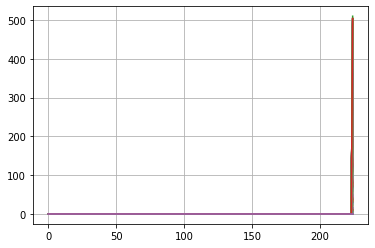

In [108]:
import cv2
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def getEven(f):
  if f.shape[0] > 1:
    getEven(f[0::2])
  return f

def getOdd(f):
  if f.shape[0] > 1:
    getOdd(f[1::2])
  return f

def fft(f):
  print(f.shape)

  A = f.shape[0]
  j = 0
  B = f.shape[1]

  for j in range(B):

    even = getEven(f[:,[j]])
    odd = getOdd(f[:,[j]])
    
    tempArray = np.zeros(A).astype(np.complex64)

    for u in range(A//2):
      tempArray[u] = even[u] + cmath.exp(-2j*math.pi*u/A) * odd[u]
      tempArray[u+A//2] = even[u] - cmath.exp(-2j*math.pi*u/A) * odd[u]

    tempMatrix = np.zeros((A,B)).astype(np.complex64)
    tempMatrix[j] = tempArray

  return tempMatrix

img = cv2.imread('picture.jpg')
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
a = np.asarray(grayscale)
fftPicture = fft(a)

plt.plot(fftPicture)
plt.grid()
plt.show()